<a href="https://colab.research.google.com/github/zw2497/Deep-Learning/blob/master/hw1_pretty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import framework

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-dev20190202


## Load Data

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Normalize

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Part 1:
### 1. Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

#### 1.1 Build linear model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels,validation_data=(test_images, test_labels), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.5971 - acc: 0.7980 - val_loss: 0.5230 - val_acc: 0.8179
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.4628 - acc: 0.8412 - val_loss: 0.4784 - val_acc: 0.8344
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.4365 - acc: 0.8503 - val_loss: 0.4630 - val_acc: 0.8387
Epoch 4/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.4224 - acc: 0.8547 - val_loss: 0.4589 - val_acc: 0.8404
Epoch 5/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.4149 - acc: 0.8557 - val_loss: 0.4540 - val_acc: 0.8414


#### 1.2 compares the training and validation accuracy

In [0]:
acc, loss, val_acc, val_loss = history.history['acc'],history.history['loss'],history.history['val_acc'],history.history['val_loss']

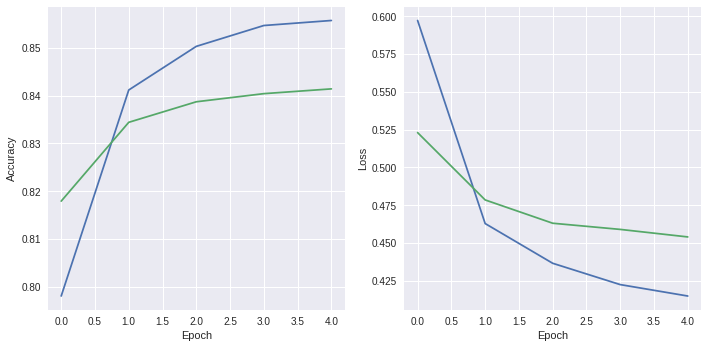

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
epochs = range(len(acc))

ax[0].plot(epochs, acc)
ax[0].plot(epochs, val_acc)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss)
ax[1].plot(epochs, val_loss)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
plt.tight_layout()

## 2. Implement and train a deep neural network to classify this dataset. No need to produce plots for this part, just try to get the validation accuracy as high as you can.

In [0]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history1 = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.4969 - acc: 0.8250 - val_loss: 0.4098 - val_acc: 0.8525
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.3718 - acc: 0.8679 - val_loss: 0.3912 - val_acc: 0.8554
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.3343 - acc: 0.8781 - val_loss: 0.3712 - val_acc: 0.8631
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.3104 - acc: 0.8861 - val_loss: 0.3710 - val_acc: 0.8655
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2927 - acc: 0.8922 - val_loss: 0.3803 - val_acc: 0.8624
Epoch 6/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2801 - acc: 0.8963 - val_loss: 0.3373 - val_acc: 0.8787
Epoch 7/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2668 - acc: 0.9001 - val_loss: 0.3657 - 

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/step
Test accuracy: 0.8414


## 3. Produce a diagram that visualizes your linear and deep models using ​plot_model​. You can find a complete example of how to use plot model ​here​. Include these plots with your submission.


In [0]:
from keras.utils import plot_model
import matplotlib.image as mpimg
plot_model(model, show_shapes=True, to_file='linear.png')
plot_model(model1, show_shapes=True, to_file='deep.png')

Using TensorFlow backend.


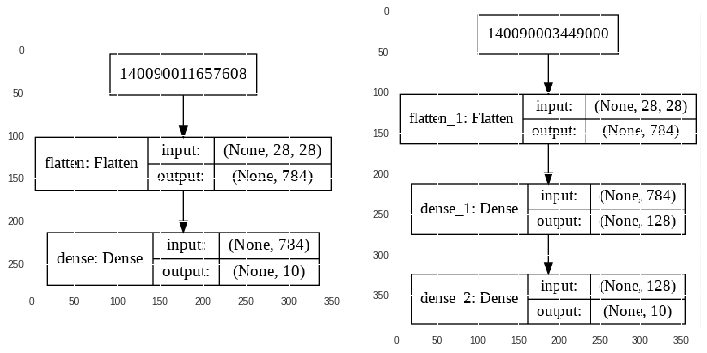

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
_ = ax[0].imshow(mpimg.imread('linear.png'))
_ = ax[1].imshow(mpimg.imread('deep.png'))

## 4. Produce a confusion matrix for one of your models, showing which classes it classifies well, and which it has trouble with. You can reuse the sklearn ​code​ for confusion matrices (it’s great). You’ll just need to use your model to make predictions on the each image in the test set, and compare them with the correct answer. Include the confusion matrix in your submission.

In [0]:
import itertools
from sklearn.metrics import confusion_matrix

In [0]:
predictions_array = model1.predict(test_images)
predictions = np.argmax(predictions_array, 1)
print(predictions.shape)

(10000,)


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.86 0.   0.01 0.01 0.   0.   0.11 0.   0.   0.  ]
 [0.01 0.96 0.   0.02 0.   0.   0.   0.   0.   0.  ]
 [0.03 0.   0.84 0.01 0.08 0.   0.05 0.   0.   0.  ]
 [0.04 0.   0.01 0.87 0.04 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.11 0.02 0.81 0.   0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.98 0.   0.01 0.   0.01]
 [0.14 0.   0.1  0.02 0.07 0.   0.67 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.03 0.   0.95 0.   0.02]
 [0.01 0.   0.   0.   0.   0.   0.01 0.   0.96 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.04 0.   0.95]]


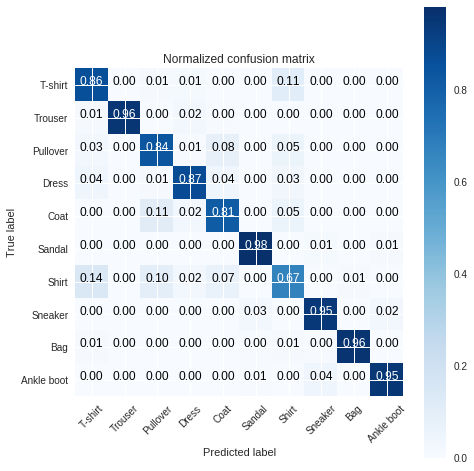

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

## 4.1 Result:
* **Shirt** is not predicted well. 
* **Trouser, Bag** is good.

# Part 2 ​(50 points)​: ​
Implement and evaluate two models to classify the Fashion MNIST dataset using the Keras Subclassing API.
## 5. Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

In [0]:
!pip install tf-nightly-2.0-preview

In [0]:
import tensorflow as tf
print("You have version", tf.__version__)
assert tf.__version__ >= "2.0"

import numpy as np
from tensorflow import keras
from tensorflow.keras import Model

You have version 2.0.0-dev20190202


In [0]:
epochs = 10
batch_size = 128

In [0]:
mnist = tf.keras.datasets.fashion_mnist

# Dataset will be cached locally after it's downloaded
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# These types are required for the operation we use later to compute loss.
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [0]:
shuffle_buffer = len(x_train)

train_dataset = tf.data.Dataset.from_tensor_slices(
                                    (x_train, y_train)
                                  ).shuffle(shuffle_buffer)
train_dataset = train_dataset.batch(batch_size)

In [0]:
def loss(logits, labels):
  return tf.reduce_mean(
      tf.nn.sparse_softmax_cross_entropy_with_logits(
          logits=logits, labels=labels))

In [0]:
def train_on_batch(model, images, labels):
  with tf.GradientTape() as tape:
    logits = model(images)
    loss_value = loss(logits, labels)
  grads = tape.gradient(loss_value, model.variables)
  optimizer.apply_gradients(zip(grads, model.variables))
  return loss_value

In [0]:
def calc_accuracy(logits, labels):
  predictions = tf.argmax(logits, axis=1)
  batch_size = int(logits.shape[0])
  acc = tf.reduce_sum(
      tf.cast(tf.equal(predictions, labels), dtype=tf.float32)) / batch_size
  return acc * 100

## 1.1 Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = keras.layers.Flatten()   
    self.d1 = keras.layers.Dense(10)
    self.a1 = tf.nn.softmax

  def call(self, x):
    # Unroll the images into arrays
    x = self.flatten(x)
    x = self.d1(x)
    x = self.a1(x)
    return x

In [0]:
model = MyModel()
acc = []
val_acc = []

optimizer = tf.keras.optimizers.Adam()

for epoch in range(epochs):
  print('Epoch', epoch + 1)
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train_on_batch(model, images, labels)
    step = optimizer.iterations.numpy() 
    if step % 100 == 0:
      print('Step %d\tLoss: %.4f' % (step, loss_value))
  
  acc.append(calc_accuracy(model(x_train), y_train))
  val_acc.append(calc_accuracy(model(x_test), y_test))
  
  print('Train accuracy %.2f' % calc_accuracy(model(x_train), y_train))
  print('Test accuracy %.2f\n' % calc_accuracy(model(x_test), y_test))

Epoch 1
Step 100	Loss: 1.8444
Step 200	Loss: 1.7927
Step 300	Loss: 1.7054
Step 400	Loss: 1.7005
Train accuracy 80.32
Test accuracy 79.16

Epoch 2
Step 500	Loss: 1.7028
Step 600	Loss: 1.7675
Step 700	Loss: 1.6363
Step 800	Loss: 1.6407
Step 900	Loss: 1.6324
Train accuracy 82.64
Test accuracy 81.40

Epoch 3
Step 1000	Loss: 1.6575
Step 1100	Loss: 1.6361
Step 1200	Loss: 1.6754
Step 1300	Loss: 1.6340
Step 1400	Loss: 1.5974
Train accuracy 83.57
Test accuracy 82.48

Epoch 4
Step 1500	Loss: 1.6040
Step 1600	Loss: 1.5591
Step 1700	Loss: 1.6610
Step 1800	Loss: 1.6044
Train accuracy 84.26
Test accuracy 83.09

Epoch 5
Step 1900	Loss: 1.6494
Step 2000	Loss: 1.6396
Step 2100	Loss: 1.6319
Step 2200	Loss: 1.6128
Step 2300	Loss: 1.6506
Train accuracy 84.69
Test accuracy 83.41

Epoch 6
Step 2400	Loss: 1.6198
Step 2500	Loss: 1.6310
Step 2600	Loss: 1.6703
Step 2700	Loss: 1.6672
Step 2800	Loss: 1.6233
Train accuracy 85.01
Test accuracy 83.65

Epoch 7
Step 2900	Loss: 1.6278
Step 3000	Loss: 1.6760
Step 3100	L

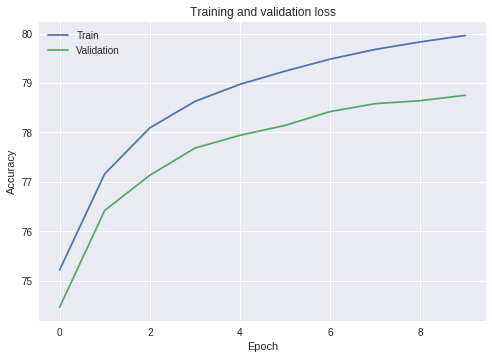

In [0]:
plt.figure()
plt.title('Training and validation loss')
epochs = range(len(acc))
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## 2. Implement and train a deep model to classify this dataset. No need to produce plots for this part, just try to get the validation accuracy as high as you can.

In [0]:
class MyModel_deep(Model):
  def __init__(self):
    super(MyModel_deep, self).__init__()
    self.flatten = keras.layers.Flatten()
    self.d1 = keras.layers.Dense(128, activation=tf.nn.relu)
    self.d2 = keras.layers.Dense(64, activation=tf.nn.relu)
    self.d3 = keras.layers.Dense(10, activation=tf.nn.softmax)
  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    x = self.d2(x)
    x = self.d3(x)
    return x

In [0]:
model_deep = MyModel_deep()

optimizer = tf.keras.optimizers.Adam()

for epoch in range(5):
  print('Epoch', epoch + 1)
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train_on_batch(model_deep, images, labels)
    step = optimizer.iterations.numpy() 
    if step % 100 == 0:
      print('Step %d\tLoss: %.4f' % (step, loss_value))
  print('Train accuracy %.2f' % calc_accuracy(model_deep(x_train), y_train))
  print('Test accuracy %.2f\n' % calc_accuracy(model_deep(x_test), y_test))

Epoch 1
Step 100	Loss: 1.7618
Step 200	Loss: 1.7080
Step 300	Loss: 1.7189
Step 400	Loss: 1.6758
Train accuracy 80.70
Test accuracy 79.82

Epoch 2
Step 500	Loss: 1.6737
Step 600	Loss: 1.6403
Step 700	Loss: 1.5824
Step 800	Loss: 1.5892
Step 900	Loss: 1.6505
Train accuracy 85.05
Test accuracy 83.90

Epoch 3
Step 1000	Loss: 1.6212
Step 1100	Loss: 1.6138
Step 1200	Loss: 1.5924
Step 1300	Loss: 1.6135
Step 1400	Loss: 1.5966
Train accuracy 85.64
Test accuracy 84.38

Epoch 4
Step 1500	Loss: 1.6049
Step 1600	Loss: 1.6102
Step 1700	Loss: 1.5931
Step 1800	Loss: 1.5802
Train accuracy 86.31
Test accuracy 84.77

Epoch 5
Step 1900	Loss: 1.6048
Step 2000	Loss: 1.6180
Step 2100	Loss: 1.5763
Step 2200	Loss: 1.5616
Step 2300	Loss: 1.5980
Train accuracy 87.33
Test accuracy 85.45



In [0]:
predictions = model_deep.predict(x_test)
print(calc_accuracy(predictions, y_test))

tf.Tensor(85.45, shape=(), dtype=float32)


# EC2
## Provide your own implementation of softmax and cross entropy loss.

In [0]:
def my_softmax(x):
  